In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Training Data Exploration

In [2]:
train_set_df = pd.read_csv(r'train.csv')

In [3]:
train_set_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('Shape of training data: ', train_set_df.shape)

Shape of training data:  (1460, 81)


In [5]:
train_set_df.info()
# Note: All dtypes are either int64 or object (categorical). Later, the categorical variables need to be one hot encoded to include them into the model training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_feats_with_NaNs = []
# Print all columns that contain NA values.
# Create a list of all features that have NaN values.
for i in train_set_df.columns:
    if train_set_df[i].isna().sum() != 0:
        print(i, train_set_df[i].isna().sum())
        train_feats_with_NaNs.append(i)

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


Problem description: <br>
NA values cannot be used for the regression. There are multiple ways to deal with NA values: <br>
1. Drop the entire feature: If more than 50% of a feature consists of NA values, it will have no huge influence on the regression, so it will be excluded completely from the analysis. <br>
2. Remove observations: If most of the features of an observation are NA values, the observation can be dropped, since it has not enough information to contribute to the regression. <br>
3. Replace the NA values: If a feature has only a few NA values, it can make sence to replace them in a sensefull way. Usually, one don't want to drop the entire observation because of a NA values in a single feature. <br>

The most work in this project will be the preparation of the data such that it fits the regression algorithm. Remember to manipulate the test set in a similar way, to enable the model (which is trained on the training data) to perform predictions on the test set. Let's further explore the features of the data first.

<Axes: >

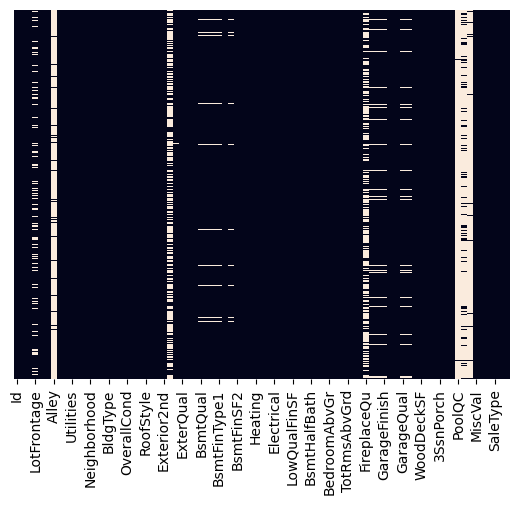

In [7]:
sns.heatmap(train_set_df.isnull(), yticklabels = False, cbar = False)

From the heatmat it can be seen, that no sample has more than half of its features missing. This means that we should not drop samples because we would loose information.
We have two options left: Fill in the missing values or drop the entire feature. The next step is to loop over all features that have missing values. If the corresponding feature consists of more than 10% missing values, the feature is dropped. If not, the missing values are filled in with the mean value of the corresponding feature. In case of categorical features, the missing values are filled with the mode of the feature, which is the most frequent category within the feature.

In [8]:
train_feats_to_remove = []
train_feats_to_replace = []
for feature in train_feats_with_NaNs:
    percentage_NA = train_set_df[feature].isnull().sum()/len(train_set_df[feature])
    if percentage_NA > 0.10:
        print(f'{feature} --> remove feature (Percentage missing: {np.round(percentage_NA, 2)})')
        train_feats_to_remove.append(feature)
    else:
        print(f'{feature} --> replace missing values (Percentage missing:{np.round(percentage_NA, 2)})')
        train_feats_to_replace.append(feature)

LotFrontage --> remove feature (Percentage missing: 0.18)
Alley --> remove feature (Percentage missing: 0.94)
MasVnrType --> remove feature (Percentage missing: 0.6)
MasVnrArea --> replace missing values (Percentage missing:0.01)
BsmtQual --> replace missing values (Percentage missing:0.03)
BsmtCond --> replace missing values (Percentage missing:0.03)
BsmtExposure --> replace missing values (Percentage missing:0.03)
BsmtFinType1 --> replace missing values (Percentage missing:0.03)
BsmtFinType2 --> replace missing values (Percentage missing:0.03)
Electrical --> replace missing values (Percentage missing:0.0)
FireplaceQu --> remove feature (Percentage missing: 0.47)
GarageType --> replace missing values (Percentage missing:0.06)
GarageYrBlt --> replace missing values (Percentage missing:0.06)
GarageFinish --> replace missing values (Percentage missing:0.06)
GarageQual --> replace missing values (Percentage missing:0.06)
GarageCond --> replace missing values (Percentage missing:0.06)
Pool

### Test Data Exploration

In [9]:
test_set_df = pd.read_csv(r'test.csv')

In [10]:
test_set_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
print('Shape of test data: ', test_set_df.shape)

Shape of test data:  (1459, 80)


In [12]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
test_feats_with_NaNs = []
for i in test_set_df.columns:
  if test_set_df[i].isna().sum() != 0:
    print(i, test_set_df[i].isna().sum())
    test_feats_with_NaNs.append(i)

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 894
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


<Axes: >

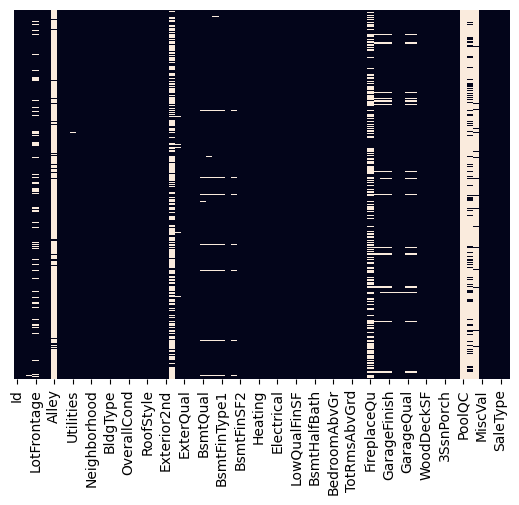

In [14]:
sns.heatmap(test_set_df.isnull(), yticklabels=False, cbar = False)

In [15]:
test_feats_to_remove = []
test_feats_to_replace = []
for feature in test_feats_with_NaNs:
    percentage_NA = test_set_df[feature].isnull().sum()/len(test_set_df[feature])
    if percentage_NA > 0.10:
        print(f'{feature} --> remove feature (Percentage missing: {np.round(percentage_NA, 2)})')
        test_feats_to_remove.append(feature)
    else:
        print(f'{feature} --> replace missing values (Percentage missing:{np.round(percentage_NA, 2)})')
        test_feats_to_replace.append(feature)

MSZoning --> replace missing values (Percentage missing:0.0)
LotFrontage --> remove feature (Percentage missing: 0.16)
Alley --> remove feature (Percentage missing: 0.93)
Utilities --> replace missing values (Percentage missing:0.0)
Exterior1st --> replace missing values (Percentage missing:0.0)
Exterior2nd --> replace missing values (Percentage missing:0.0)
MasVnrType --> remove feature (Percentage missing: 0.61)
MasVnrArea --> replace missing values (Percentage missing:0.01)
BsmtQual --> replace missing values (Percentage missing:0.03)
BsmtCond --> replace missing values (Percentage missing:0.03)
BsmtExposure --> replace missing values (Percentage missing:0.03)
BsmtFinType1 --> replace missing values (Percentage missing:0.03)
BsmtFinSF1 --> replace missing values (Percentage missing:0.0)
BsmtFinType2 --> replace missing values (Percentage missing:0.03)
BsmtFinSF2 --> replace missing values (Percentage missing:0.0)
BsmtUnfSF --> replace missing values (Percentage missing:0.0)
TotalBsm

### Combine Train and Test Exploration Results

In [16]:
feats_to_remove = set(train_feats_to_remove + test_feats_to_remove)
feats_to_replace = set(train_feats_to_replace + test_feats_to_replace)

In [18]:
# with open("feats_to_remove.txt", "w") as f:
#     for item in feats_to_remove:
#         f.write(f"{item}\n")

# with open("feats_to_replace.txt", "w") as f:
#     for item in feats_to_replace:
#         f.write(f"{item}\n")